# Simple Implementation of [Iris](https://archive.ics.uci.edu/ml/datasets/Iris) dataset


In [706]:
import numpy as np
from matplotlib import pyplot as plt



def loadData(fileName, dataLen):
    """
    loads a file.data into a numpy array
    filename: string
    dataLen: int
    
    return: 
    dataSetInput: n x n numpy ndarray every row represents a stream of input
    dataSetClass: n x 1 numpy ndarray

    """



    file = open(fileName, 'rb')
    data = [row.decode('utf-8').split(',') for row in file]
    file.close()

    data= data[:dataLen]

    #data input ---> x
    data_in = [row[:-1] for row in data]
    dataSetInput = np.array(data_in, dtype=float)

    #data classes ---> groud truth
    data_class = [row[-1][:-1] for row in data]
    dataSetClass = np.array(data_class)
    
    return dataSetInput, dataSetClass



dataSetInput,dataSetClass = loadData('iris-data/iris.data', 150)


# Normalize the data

mean:  [5.84333333 3.054      3.75866667 1.19866667]
std:  [0.82530129 0.43214658 1.75852918 0.76061262]


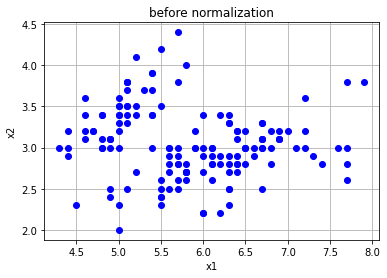

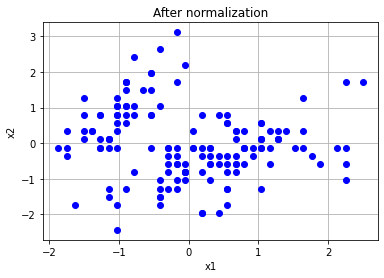

In [707]:
def normalizeData(dataSetInput, plot=False):
    """
    subtracting mean and dviding by the std
    
     dataSetInput: n x n numpy ndarray every row represents a stream of input
     plot: bolean weather to show plot or not

    """

    mean = np.mean(dataSetInput, axis=0)
    std = np.std(dataSetInput, axis=0)
    print ('mean: ', mean)
    print ('std: ', std)


    if plot: 
        plt.plot(np.transpose(dataSetInput)[0], np.transpose(dataSetInput)[1], 'bo')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.grid(True)
        plt.title("before normalization")
        plt.show()

    # normalizing the data
    dataSetInput -= mean
    dataSetInput /= std
    
    if plot:
        plt.plot(np.transpose(dataSetInput)[0], np.transpose(dataSetInput)[1], 'bo')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.grid(True)
        plt.title("After normalization")
        plt.show()

# test 
# x = np.array([[1., 2], [3, 4], [5, 6], [7, 8]])
# normalizeData(x, True)
# print(x)

normalizeData(dataSetInput, True) #our data is normalized

# generating true ouput

In [708]:
def generateOuput(class_l, dataSetClass):
    '''
    converts class names into vecor
    example: "classX" => [1, 0, 0, 0]
    class_l: list of strings of the name of the classes
    dataSetClass: numpy column vector of strings
    
    returns: a numpy matrix len(dataSetClas) x len(class_l)
    '''
    
    class_d = {}
    dataSetOutput = np.zeros((dataSetClass.shape[0], len(class_l)))
    
    for i in range(len(class_l)):
        class_d[class_l[i]] = i
        
    
    for i in range(len(dataSetClass)):
        c = dataSetClass[i]
        true_i = class_d[c]
        dataSetOutput[i][true_i] =1

    return dataSetOutput
    
dataSetOutput =generateOuput(["Iris-setosa", "Iris-versicolor", "Iris-virginica"], dataSetClass)
    

# Adding Bias

In [709]:
dataSetInput = np.append(dataSetInput, np.transpose([ np.ones(dataSetInput.shape[0]) ]), axis=1)
# testing 
# l = [[1, 2], [3, 4]]
# l = np.array(l)
# one = np.ones(l.shape[0])
# out = np.append(l, np.transpose([one]), axis=1)
# print(out)

# Split in train and test

In [710]:
# split into train and test
rand = np.random.rand(150) 

#inputs
dataSetTestInput = dataSetInput[rand > .5]
dataSetInput = dataSetInput[rand <= .5]

#output
dataSetTestOutput = dataSetOutput[rand > .5]
dataSetOutput = dataSetOutput[rand <= .5]

print(dataSetTestInput.shape)
print(dataSetInput.shape)

print(dataSetTestOutput.shape)
print(dataSetOutput.shape)




(73, 5)
(77, 5)
(73, 3)
(77, 3)


# Activation Functions

In [711]:
#activation function 
act = {'leakRelu': lambda x:np.maximum(.001*x, x),
       'tanch': lambda x:np.tanh(x),
        'sigmoid': lambda x:np.transpose(np.exp(x).T/np.sum(np.exp(x), axis=1))}


def leekRelyDrevative(x, leak):
    if len(x.shape) != 1:
        x_vec = x.reshape(x.shape[0]*x.shape[1])
    else:
        x_vec = x

    y = []
    for i in range(len(x_vec)):
        if x_vec[i] >0:
            y.append(1)
            
        elif x_vec[i]<0:
            y.append(leak)
            
        else:
            y.append(0)

    y = np.array(y)
    return y.reshape(x.shape)


actDrevative = {'leakRelu':lambda x: leekRelyDrevative(x, .001),
       'tanch': lambda x:np.tanh(x),
        'sigmoid': lambda x: act['sigmoid'](x)*(1-act['sigmoid'](x))}

# Test
# x = np.array([1, 2, 3, 4, -10])
# y = actDrevative['leakRelu'](x)
# print(x)
# print(y)


# Defining  hidden layers

W.shape= (5, 10)


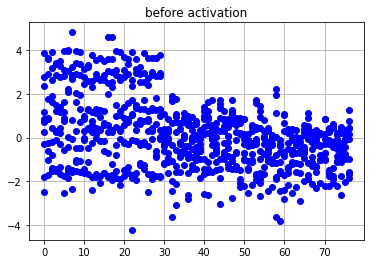

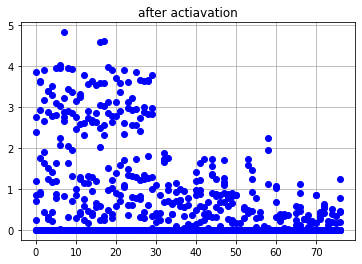

W.shape= (10, 3)


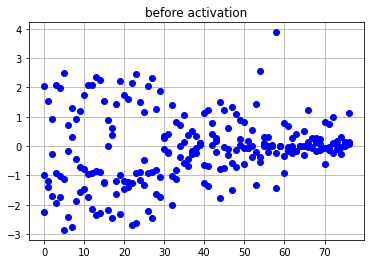

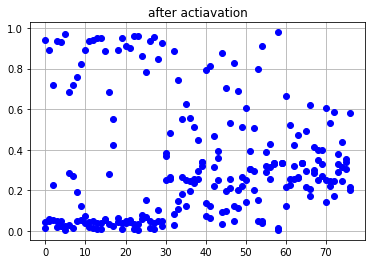

In [712]:
#init weights 
hiddenLayerSizes = [10, 3]
nonlinearities = ['leakRelu']*(len(hiddenLayerSizes)-1) + ['sigmoid']
weights = []



#forward path
Hsaved = {}
for i in range (len(hiddenLayerSizes)): 
    X = dataSetInput if i==0 else Hsaved[i-1] 
    fan_in = X.shape[1] 
    fan_out = hiddenLayerSizes[i] #selecting the size of the hidden layer 
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2) 
    weights.append(W)  #saving weights
    print ("W.shape=", W.shape)
    
    H = np.matmul(X, W) #matrix multplixation
   
    plt.plot(H, 'bo')
    plt.grid(True)
    plt.title("before activation")
    plt.show()

    H = act[nonlinearities[i]](H)  #applying activation function 
    
    
    plt.plot(H, 'bo')
    plt.grid(True)
    plt.title("after actiavation")
    plt.show()
    
    Hsaved[i] = H # saveing resluts to use it to the next loop



# loss function [cross Entropy](https://gist.github.com/Atlas7/22372a4f6b0846cfc3797766d7b529e8)

In [713]:
# loass function 
def my_log(x):
    y = np.zeros(x.shape)
    
    if len(x.shape) == 1:
        for i in range(x.shape[0]):
            if x[i] != 0:
                y[i] = np.log(x[i])
    else:
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                if x[i][j] != 0:
                    y[i][j] = np.log(x[i][j])
    return y

#test
# print(my_log(np.array([3, 4, 0])))


def crossEntropyLoss(trueY, predictY):
                    
    loss=-(1.0/trueY.shape[0])* np.sum(trueY*my_log(predictY) + (1-trueY)*my_log(1-predictY))
    
    return loss
#test
# print(crossEntropyLoss(dataSetOutput[:2], np.array([[1, 0, 0], [.3, .4, 0]])))


#loss dervative
def crossEntropyLossDrvative(trueY, predictY):
    d= -(1.0/trueY.shape[0])* (trueY/predictY - (1-trueY)/(1-predictY))
    return d

# test
# print("test loss dervative:", crossEntropyLossDrvative(np.array([[1, 0, 0], [0, 1, 0]]), np.array([[.2, .7, 0.1], [.3, .4, .3]])) )   

# Forward Path

In [714]:
#forward path
def forward(dataInput, plot=False, debug=False):
    outputFlow_list = []
    outputFlow_list.append(dataInput)
    
    for i in range (len(hiddenLayerSizes)): 
        X = outputFlow_list[-1] 
        W = weights[i]
        
        H = np.matmul(X, W) #matrix multplixation
        if debug:
            print("X: ", X.shape, ", W:", W.shape, " =H.shape=", H.shape)
        outputFlow_list.append(H)

        if plot:
            plt.plot(H, 'bo')
            plt.grid(True)
            plt.title("before activation")
            plt.show()

        H = act[nonlinearities[i]](H)  #applying activation function 
        if debug:
            print("after activation H: ",H.shape)
        outputFlow_list.append(H) # saveing resluts to use it to the next loop

        if plot:
            plt.plot(H, 'bo')
            plt.grid(True)
            plt.title("after actiavation")
            plt.show()

        
    
    return outputFlow_list

# test loop
outputFlow_list = forward(dataSetInput)
for i in range(len(outputFlow_list)): 
    print("flow[", i, ']=', outputFlow_list[i][:1])
    print("flow[", i, ']=', outputFlow_list[i].shape)

flow[ 0 ]= [[-1.14301691 -0.1249576  -1.3412724  -1.31297673  1.        ]]
flow[ 0 ]= (77, 5)
flow[ 1 ]= [[-0.29047051  0.85777459  2.7532745   0.2442746   1.17889496 -2.51212763
   3.86356413 -1.79684839  2.38295519  0.70098796]]
flow[ 1 ]= (77, 10)
flow[ 2 ]= [[-2.90470511e-04  8.57774587e-01  2.75327450e+00  2.44274596e-01
   1.17889496e+00 -2.51212763e-03  3.86356413e+00 -1.79684839e-03
   2.38295519e+00  7.00987961e-01]]
flow[ 2 ]= (77, 10)
flow[ 3 ]= [[ 2.05944111 -2.23688077 -0.9738475 ]]
flow[ 3 ]= (77, 3)
flow[ 4 ]= [[0.94181862 0.01282621 0.04535517]]
flow[ 4 ]= (77, 3)


# BackPropagation

In [715]:
# back brobagation
def backpropagationDetailed(lr, outputFlow_list, debug=False):
    derv = None # the variable that will hold the chain rule product 
    y_hat = outputFlow_list[-1] # the output of our netwok
    
    #1- loss dervative
    drev = crossEntropyLossDrvative(dataSetOutput, y_hat)
    if debug:
        print("1- dervative = ",drev.shape, drev[:1] )
        print()
    
    #2- sigmoid
    yBeforeSig  = outputFlow_list[-2]
    sigmoidDrev = actDrevative['sigmoid'](yBeforeSig) # 150 x 3
    drev = drev * sigmoidDrev
    if debug:
        print("2- dervative = ",drev.shape, drev[:1] )
        print("y-sigmoidDrev-inupt=", yBeforeSig[:1])
        print("y-sigmoidDrev-output=", sigmoidDrev[:1])
        print()


    
    # 3- hidden layer (gradient)
    grad_step = np.matmul(np.transpose(outputFlow_list[-3]), drev) # (10 x 150) (150 x 3) = (10 x 3)
    weights[-1] -= lr * grad_step
    if debug:
        print("grad-step= ",grad_step.shape, grad_step[:1])
    
    drev = np.matmul(drev, np.transpose(weights[-1])) # (150 x 3) (3 x 10) = (150 x 10)
    if debug:
        print("3- dervative = ",drev.shape, drev[:1] )
        print()

    
    #4- reulu
    reluDev = actDrevative['leakRelu'](outputFlow_list[-4])  # 150 x 10
#     reluDev = np.random.rand(150, 10)
    drev = drev * reluDev # elemet wise product
    if debug:
        print("reludev input=", outputFlow_list[-4][:1])
        print("reludev output", reluDev[:1])
        print("4- drevative = ",drev.shape, drev[:1] )
        print()

    
    #4- layer 1 output (gradient)
    grad_step = np.matmul(np.transpose(outputFlow_list[-5]), drev) # x(5 x 150) (150 x 10) = (5 x 10)
    weights[-2] -= lr * grad_step
    if debug:
        print("grad-step= ",grad_step.shape, grad_step[:1])
        
    drev = np.matmul(drev, np.transpose(weights[-2])) # (150 x 10) (10 x 4) = (150 x 4)
                                                      # for the bias and gradient of the input
    if debug:
        print("5- dervative = ",drev.shape, drev[:1] )

    
    
    

# Generic backpropagation

In [716]:
# back brobagation
def backpropagationGeneric(lr, outputFlow_list, debug=False):
    derv = None # the variable that will hold the chain rule product 
    backIndex = -1
    y_hat = outputFlow_list[backIndex] # the output of our netwok
    
    #1- loss dervative
    drev = crossEntropyLossDrvative(dataSetOutput, y_hat)
    if debug:
        print("1- dervative (loss) = ",drev.shape, drev[:1] )
        print()
    
    # looping over all hidden layers
    for i in range(len(hiddenLayerSizes)-1, -1, -1):
        # 1- activation
        backIndex -= 1
        beforeActivaion  = outputFlow_list[backIndex]
        activationDrev = actDrevative[nonlinearities[i]](beforeActivaion) # 150 x 3
        drev = drev * activationDrev
        if debug:
            print("1- dervative = ",drev.shape, drev[:1] )
            print("y-before-activation=", beforeActivaion[:1])
            print("y-activation-dervative=", activationDrev[:1])
            print()     
        
        # 2- grad
        backIndex -= 1
        X = outputFlow_list[backIndex]
        grad_step = np.matmul(np.transpose(X), drev) # (10 x 150) (150 x 3) = (10 x 3)
        weights[i] -= lr * grad_step
        if debug:
            print("2- grad-step= ",grad_step.shape, grad_step[:1])

        
        # 3 drev throw the path
        drev = np.matmul(drev, np.transpose(weights[i])) # (150 x 3) (3 x 10) = (150 x 10)
        if debug:
            print("3- dervative = ",drev.shape, drev[:1] )
            print()

    
    


# Testing 

In [717]:
# evaluating test

def test(trueY, predictY, dataSetClass=1):
    """
    performing test and returns the accuracy of the data
    TODO return class names
    """
    predictIndex = np.argmax(predictY, axis=1) #along rows

    truePredicts =0
    counter =0
    for i in predictIndex:
        if trueY[counter][i] == 1:
            truePredicts +=1
        counter +=1
    return truePredicts/trueY.shape[0]



# Train

In [718]:
lossL = []
scoreL = []
def train(epochs, lr):
   
    for i in range(epochs):
        #forward
        outputFlow_list = forward(dataSetInput)

        #loss calculations
        loss = crossEntropyLoss(dataSetOutput, outputFlow_list[-1])
        lossL.append(loss)
        
        
        #backpropagation
#         backpropagationDetailed(lr, outputFlow_list, debug=False)
        backpropagationGeneric(lr, outputFlow_list, debug=False)

        
        # TESTING
        #forward
        outputFlow_list = forward(dataSetTestInput)
        #evaluationg score
        score = test(dataSetTestOutput, outputFlow_list[-1])
        scoreL.append(score)
    

        
        print("Epoch: ",i, ", Loss=", loss, ", Score=", score )
        

In [719]:
train(1000, .2)



Epoch:  0 , Loss= 1.881512094125832 , Score= 0.3698630136986301
Epoch:  1 , Loss= 1.6861623239677883 , Score= 0.3835616438356164
Epoch:  2 , Loss= 1.52606824253365 , Score= 0.4383561643835616
Epoch:  3 , Loss= 1.3969418639795563 , Score= 0.5342465753424658
Epoch:  4 , Loss= 1.2796006976432683 , Score= 0.5616438356164384
Epoch:  5 , Loss= 1.1784737014905722 , Score= 0.5753424657534246
Epoch:  6 , Loss= 1.0899217201669285 , Score= 0.589041095890411
Epoch:  7 , Loss= 1.0102172223007053 , Score= 0.589041095890411
Epoch:  8 , Loss= 0.9402373293151565 , Score= 0.6027397260273972
Epoch:  9 , Loss= 0.8769024456468525 , Score= 0.6712328767123288
Epoch:  10 , Loss= 0.8206498329355314 , Score= 0.6438356164383562
Epoch:  11 , Loss= 0.7730245065716889 , Score= 0.6575342465753424
Epoch:  12 , Loss= 0.7329648968771445 , Score= 0.6575342465753424
Epoch:  13 , Loss= 0.6992254122819006 , Score= 0.6712328767123288
Epoch:  14 , Loss= 0.6705502181609351 , Score= 0.7123287671232876
Epoch:  15 , Loss= 0.6460

Epoch:  137 , Loss= 0.1365887322632297 , Score= 0.958904109589041
Epoch:  138 , Loss= 0.1358907134766965 , Score= 0.958904109589041
Epoch:  139 , Loss= 0.13520374057915277 , Score= 0.958904109589041
Epoch:  140 , Loss= 0.13452754852059798 , Score= 0.958904109589041
Epoch:  141 , Loss= 0.13386180098473166 , Score= 0.958904109589041
Epoch:  142 , Loss= 0.1332160499881739 , Score= 0.958904109589041
Epoch:  143 , Loss= 0.13259513591000066 , Score= 0.958904109589041
Epoch:  144 , Loss= 0.1319839425644397 , Score= 0.958904109589041
Epoch:  145 , Loss= 0.131383970604239 , Score= 0.958904109589041
Epoch:  146 , Loss= 0.13079111303922472 , Score= 0.958904109589041
Epoch:  147 , Loss= 0.13020609049205562 , Score= 0.958904109589041
Epoch:  148 , Loss= 0.12963208221242617 , Score= 0.958904109589041
Epoch:  149 , Loss= 0.12906706092888284 , Score= 0.958904109589041
Epoch:  150 , Loss= 0.1285098376316051 , Score= 0.958904109589041
Epoch:  151 , Loss= 0.12796014005112866 , Score= 0.958904109589041
Ep

Epoch:  305 , Loss= 0.08317208423297362 , Score= 0.958904109589041
Epoch:  306 , Loss= 0.08299947628477701 , Score= 0.958904109589041
Epoch:  307 , Loss= 0.08282711835689295 , Score= 0.958904109589041
Epoch:  308 , Loss= 0.08265493977987326 , Score= 0.958904109589041
Epoch:  309 , Loss= 0.08248350219530913 , Score= 0.958904109589041
Epoch:  310 , Loss= 0.08231283656957888 , Score= 0.958904109589041
Epoch:  311 , Loss= 0.08214428699955058 , Score= 0.958904109589041
Epoch:  312 , Loss= 0.08197493977806922 , Score= 0.958904109589041
Epoch:  313 , Loss= 0.08180631186346046 , Score= 0.958904109589041
Epoch:  314 , Loss= 0.08163838956072957 , Score= 0.958904109589041
Epoch:  315 , Loss= 0.08147186805930298 , Score= 0.958904109589041
Epoch:  316 , Loss= 0.08130607673894674 , Score= 0.958904109589041
Epoch:  317 , Loss= 0.08114015430654944 , Score= 0.958904109589041
Epoch:  318 , Loss= 0.08097492002079841 , Score= 0.958904109589041
Epoch:  319 , Loss= 0.08081040319702297 , Score= 0.95890410958

Epoch:  472 , Loss= 0.06132176612608739 , Score= 0.958904109589041
Epoch:  473 , Loss= 0.06122167354633536 , Score= 0.958904109589041
Epoch:  474 , Loss= 0.061121290900675355 , Score= 0.958904109589041
Epoch:  475 , Loss= 0.061020974344526205 , Score= 0.958904109589041
Epoch:  476 , Loss= 0.06092180949743634 , Score= 0.958904109589041
Epoch:  477 , Loss= 0.060822052424281056 , Score= 0.958904109589041
Epoch:  478 , Loss= 0.06072266301598072 , Score= 0.958904109589041
Epoch:  479 , Loss= 0.06062414581770069 , Score= 0.958904109589041
Epoch:  480 , Loss= 0.06052510733727228 , Score= 0.958904109589041
Epoch:  481 , Loss= 0.06042670372406707 , Score= 0.958904109589041
Epoch:  482 , Loss= 0.060328727452168995 , Score= 0.958904109589041
Epoch:  483 , Loss= 0.06023045595526697 , Score= 0.958904109589041
Epoch:  484 , Loss= 0.060133016072675544 , Score= 0.958904109589041
Epoch:  485 , Loss= 0.060035581055140334 , Score= 0.958904109589041
Epoch:  486 , Loss= 0.05993806477439489 , Score= 0.95890

Epoch:  633 , Loss= 0.047931991442485555 , Score= 0.958904109589041
Epoch:  634 , Loss= 0.04786328366561994 , Score= 0.958904109589041
Epoch:  635 , Loss= 0.04779511248356318 , Score= 0.958904109589041
Epoch:  636 , Loss= 0.04772678092608079 , Score= 0.958904109589041
Epoch:  637 , Loss= 0.04765893340320742 , Score= 0.958904109589041
Epoch:  638 , Loss= 0.04759088145952187 , Score= 0.958904109589041
Epoch:  639 , Loss= 0.047523430846824796 , Score= 0.958904109589041
Epoch:  640 , Loss= 0.04745569648963566 , Score= 0.958904109589041
Epoch:  641 , Loss= 0.04738841072467005 , Score= 0.958904109589041
Epoch:  642 , Loss= 0.04732110981559028 , Score= 0.958904109589041
Epoch:  643 , Loss= 0.04725399229791467 , Score= 0.958904109589041
Epoch:  644 , Loss= 0.04718711272938622 , Score= 0.958904109589041
Epoch:  645 , Loss= 0.047120166718018316 , Score= 0.958904109589041
Epoch:  646 , Loss= 0.04705370248293182 , Score= 0.958904109589041
Epoch:  647 , Loss= 0.04698699885806081 , Score= 0.95890410

Epoch:  797 , Loss= 0.038461558359586714 , Score= 0.958904109589041
Epoch:  798 , Loss= 0.03841323115061229 , Score= 0.958904109589041
Epoch:  799 , Loss= 0.03836494496820699 , Score= 0.958904109589041
Epoch:  800 , Loss= 0.03831671973301289 , Score= 0.958904109589041
Epoch:  801 , Loss= 0.038268609083456646 , Score= 0.958904109589041
Epoch:  802 , Loss= 0.03822068888431881 , Score= 0.958904109589041
Epoch:  803 , Loss= 0.03817275470104796 , Score= 0.958904109589041
Epoch:  804 , Loss= 0.038124919504352935 , Score= 0.958904109589041
Epoch:  805 , Loss= 0.03807724249834989 , Score= 0.958904109589041
Epoch:  806 , Loss= 0.03802965928200687 , Score= 0.958904109589041
Epoch:  807 , Loss= 0.037982111715602174 , Score= 0.958904109589041
Epoch:  808 , Loss= 0.03793466187841192 , Score= 0.958904109589041
Epoch:  809 , Loss= 0.03788740167747943 , Score= 0.958904109589041
Epoch:  810 , Loss= 0.03784016425678517 , Score= 0.958904109589041
Epoch:  811 , Loss= 0.03779299893581485 , Score= 0.9589041

Epoch:  964 , Loss= 0.03157413004583894 , Score= 0.958904109589041
Epoch:  965 , Loss= 0.03153900871334695 , Score= 0.958904109589041
Epoch:  966 , Loss= 0.031504483275340396 , Score= 0.958904109589041
Epoch:  967 , Loss= 0.03147052627808942 , Score= 0.958904109589041
Epoch:  968 , Loss= 0.031435592449633794 , Score= 0.958904109589041
Epoch:  969 , Loss= 0.031400734505282024 , Score= 0.958904109589041
Epoch:  970 , Loss= 0.031365948375600965 , Score= 0.958904109589041
Epoch:  971 , Loss= 0.03133120670288731 , Score= 0.958904109589041
Epoch:  972 , Loss= 0.03129772742666236 , Score= 0.958904109589041
Epoch:  973 , Loss= 0.03126346640149791 , Score= 0.958904109589041
Epoch:  974 , Loss= 0.03122890938381722 , Score= 0.958904109589041
Epoch:  975 , Loss= 0.031194416924857693 , Score= 0.958904109589041
Epoch:  976 , Loss= 0.031160002813112757 , Score= 0.958904109589041
Epoch:  977 , Loss= 0.031125938258963058 , Score= 0.958904109589041
Epoch:  978 , Loss= 0.031092884951063153 , Score= 0.958

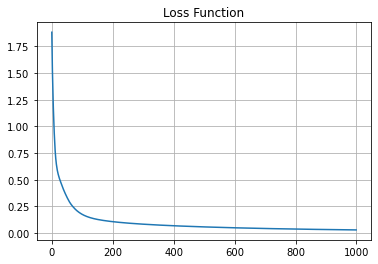

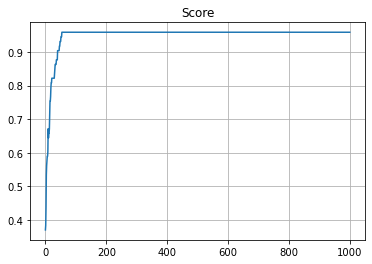

max-score= 0.958904109589041


In [720]:
plt.plot(lossL)
plt.grid(True)
plt.title("Loss Function")
plt.show()

plt.plot(scoreL)
plt.grid(True)
plt.title("Score")
plt.show()

print("max-score=", np.max(scoreL))
